#Collecting Data

Data ini diambil dari kaggle https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

#Preparing Dataset

1. Importing necessary library
2. Filtering dataset (surabaya only)
3. Cleaning unnecessary variable
4. Exploratory data analysis

#Importing necessary library


In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import random
import json

#Filtering Dataset (Surabaya Only)

In [2]:
# #importing dataset from api
# getPlace = requests.get("https://newapi.thisiswasyrof.works/v1/master/get-tour-destination").json()
# getRating = requests.get("https://newapi.thisiswasyrof.works/v1/master/get-ratings").json()

# place = pd.json_normalize(getPlace['data'])
#place = pd.read_csv("https://thisiswasyrof.works/file/data_wisata.csv", delimiter=';')
#rating = pd.read_csv("https://thisiswasyrof.works/file/new_rating.csv")

place = requests.get('http://34.173.0.159:3000/v1/master/get-tour-destination').json()
place = pd.DataFrame(place['data'])
rating = requests.get('http://34.173.0.159:3000/v1/master/get-ratings').json()
rating = pd.DataFrame(rating['data'])

# rating = pd.json_normalize(getRating['data'])

print(place.head())


   id                      tour_category_id                            name  \
0   1  8c359fa2-d576-44f4-a2d3-ed9e6574bc63                   Kenjeran Park   
1   2  e13348f5-233e-44df-9c55-a821cd969b52            Taman Hiburan Rakyat   
2   3  e1004438-0b73-4c9e-8b64-5f36285c711c  Surabaya Museum (Gedung Siola)   
3   4  7890e53f-bece-438f-a82a-32a067faf8fb               Air Mancur Menari   
4   5  e13348f5-233e-44df-9c55-a821cd969b52             Balai Kota Surabaya   

  phone email  price                                        description  \
0              35000  Kenjeran Park merupakan salah satu tempat wisa...   
1               5000  Taman Hiburan Rakyat atau THR tentunya sudah t...   
2                  0  Saat ini Museum Surabaya Siola menjelma menjad...   
3              35000  Jembatan Kenjeran dengan air mancur menarinya ...   
4                  0  Surabaya sebagai Resort Gemeente (Haminte) sec...   

          address longitude  latitude  ... day_open_end time_open_start  \

In [3]:
print(rating.head())

   id                               user_id  tourist_destination_id  score  \
0   1  a73naa79-18w8-4c89-8003-43330b1a99o3                      18      2   
1   2  bd4faa79-04b8-4c89-8003-43330b1a9fc2                       5      1   
2   3  a73n89sa-18w8-4c89-8003-43330b1a99o3                      21      2   
3   4  a73naa79-18w8-4c89-8003-43330b1a99o3                      14      1   
4   5  bd4faa79-04b8-4c89-8003-43330b1a9fc2                       8      0   

                       review                 createdAt  \
0  Lorem ipsum dolor sit amet  2023-06-16T09:26:22.000Z   
1  Lorem ipsum dolor sit amet  2023-06-16T09:26:22.000Z   
2  Lorem ipsum dolor sit amet  2023-06-16T09:26:22.000Z   
3  Lorem ipsum dolor sit amet  2023-06-16T09:26:22.000Z   
4  Lorem ipsum dolor sit amet  2023-06-16T09:26:22.000Z   

                  updatedAt  
0  2023-06-16T09:26:22.000Z  
1  2023-06-16T09:26:22.000Z  
2  2023-06-16T09:26:22.000Z  
3  2023-06-16T09:26:22.000Z  
4  2023-06-16T09:26:22.000

In [4]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                36 non-null     int64 
 1   tour_category_id  36 non-null     object
 2   name              36 non-null     object
 3   phone             36 non-null     object
 4   email             36 non-null     object
 5   price             36 non-null     object
 6   description       36 non-null     object
 7   address           36 non-null     object
 8   longitude         36 non-null     object
 9   latitude          36 non-null     object
 10  day_open_start    36 non-null     object
 11  day_open_end      36 non-null     object
 12  time_open_start   36 non-null     object
 13  time_open_end     36 non-null     object
 14  picture           36 non-null     object
 15  user_id           36 non-null     object
 16  createdAt         36 non-null     object
 17  updatedAt         

In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      5001 non-null   int64 
 1   user_id                 5001 non-null   object
 2   tourist_destination_id  5001 non-null   int64 
 3   score                   5001 non-null   int64 
 4   review                  5001 non-null   object
 5   createdAt               5001 non-null   object
 6   updatedAt               5001 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


#Explanatory data analysis

In [6]:
top_15 = rating['tourist_destination_id'].value_counts().reset_index()[0:15]
top_15 = pd.merge(top_15, place[['id', 'name']], how='left', left_on='index', right_on='id')
print(top_15)

    index  tourist_destination_id  id                              name
0      17                     172  17      Taman Flora Bratang Surabaya
1      34                     166  34                  Taman Barunawati
2      35                     165  35               Hutan Bambu Keputih
3      36                     156  36               Taman Kunang-Kunang
4      27                     154  27                    Taman Prestasi
5      26                     153  26       Food Junction Grand Pakuwon
6       3                     151   3    Surabaya Museum (Gedung Siola)
7      10                     150  10     Museum Kesehatan Dr. Adhyatma
8       5                     147   5               Balai Kota Surabaya
9      22                     144  22  Taman Air Mancur Menari Kenjeran
10     25                     143  25          Masjid Cheng Ho Surabaya
11     29                     143  29    Monumen Bambu Runcing Surabaya
12      7                     142   7             Taman Harmoni 

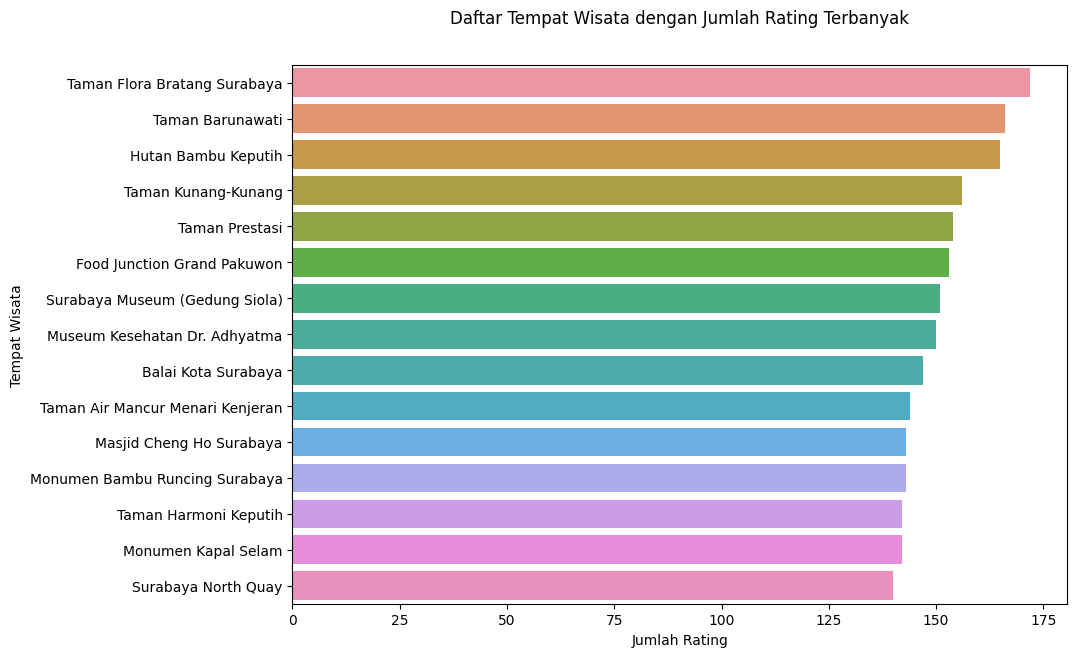

In [7]:
#Displaying the plot
plt.figure(figsize=(10, 7))
sns.barplot(x='tourist_destination_id', y='name', data=top_15)
plt.title('Daftar Tempat Wisata dengan Jumlah Rating Terbanyak', pad=30)
plt.xlabel('Jumlah Rating')
plt.ylabel('Tempat Wisata')
plt.show()

In [8]:
#Displaying the comparison of the destination categories in the Surabaya
#sns.countplot(y='tour_categories_id', data=place)
#plt.title('Perbandingan Kategori Tempat Wisata di Kota Surabaya')
#plt.show()


# Modelling Content Based Filtering

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [10]:
td = TfidfVectorizer(stop_words='english')
tfidf_matrix = td.fit_transform(place['description'])
tfidf_matrix.shape

(36, 1353)

In [11]:
#Computing the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.05172548, 0.13267492, ..., 0.16167096, 0.14430957,
        0.06407432],
       [0.05172548, 1.        , 0.08673272, ..., 0.19315903, 0.09941906,
        0.12934845],
       [0.13267492, 0.08673272, 1.        , ..., 0.17301347, 0.09550717,
        0.08424167],
       ...,
       [0.16167096, 0.19315903, 0.17301347, ..., 1.        , 0.23843206,
        0.13771358],
       [0.14430957, 0.09941906, 0.09550717, ..., 0.23843206, 1.        ,
        0.08271473],
       [0.06407432, 0.12934845, 0.08424167, ..., 0.13771358, 0.08271473,
        1.        ]])

In [12]:
#Construct a reverse map of indices and movie title
indicate = pd.Series(place.index, index=place['name']).drop_duplicates()

In [13]:
#Function that takes in place name as input and outputs most similar destination
def recommendation(Place_name, cosine_sim=cosine_sim):
  idx = indicate[Place_name]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  destination_indicate = [i[0] for i in sim_scores]
  return place['name'].iloc[destination_indicate]

In [14]:
#randoming place
placeName = random.choice(place['name'])
print(placeName)
# Giving destination recomendation from place that input from user
modelc=recommendation(placeName)

Taman Harmoni Keputih


In [15]:
modelc

16      Taman Flora Bratang Surabaya
33                  Taman Barunawati
15               Taman Buah Surabaya
19                       Taman Mundu
7                      Taman Bungkul
2     Surabaya Museum (Gedung Siola)
32                     Taman Pelangi
26                    Taman Prestasi
1               Taman Hiburan Rakyat
30               Surabaya North Quay
Name: name, dtype: object


# Collaborative Based Filtering


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

In [17]:
#Filtering data
min_place_rating = 20
filter_place = (rating["tourist_destination_id"].value_counts()>min_place_rating)
filter_place = filter_place[filter_place].index.tolist()

min_user_rating =3
filter_user = (rating["user_id"].value_counts()>min_user_rating)
filter_user = filter_user[filter_user].index.tolist()

filtered_data = rating[(rating["tourist_destination_id"].isin(filter_place)) & (rating["user_id"]).isin(filter_user)]
print(rating.shape)
print(filtered_data.shape)
print(filtered_data)

(5001, 7)
(5001, 7)
        id                               user_id  tourist_destination_id  \
0        1  a73naa79-18w8-4c89-8003-43330b1a99o3                      18   
1        2  bd4faa79-04b8-4c89-8003-43330b1a9fc2                       5   
2        3  a73n89sa-18w8-4c89-8003-43330b1a99o3                      21   
3        4  a73naa79-18w8-4c89-8003-43330b1a99o3                      14   
4        5  bd4faa79-04b8-4c89-8003-43330b1a9fc2                       8   
...    ...                                   ...                     ...   
4996  4997  a73naa79-18w8-4c89-8003-71yhs88293e3                      11   
4997  4998  bd4faa79-04b8-4c89-8003-43330b1a9fc2                      31   
4998  4999  bd4faa79-04b8-4c89-8003-772ujhu27717                      33   
4999  5000  a73naa79-18w8-4c89-8003-71yhs88293e3                       9   
5000  5001  bd4faa79-04b8-1827-8003-28817b1a9fc2                      25   

      score                      review                 createdAt  

In [18]:
#Copy filtered data to another dataset
df = filtered_data.copy()
df

,id,user_id,tourist_destination_id,score,review,createdAt,updatedAt
0,1,a73naa79-18w8-4c89-8003-43330b1a99o3,18,2,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
1,2,bd4faa79-04b8-4c89-8003-43330b1a9fc2,5,1,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
2,3,a73n89sa-18w8-4c89-8003-43330b1a99o3,21,2,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
3,4,a73naa79-18w8-4c89-8003-43330b1a99o3,14,1,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
4,5,bd4faa79-04b8-4c89-8003-43330b1a9fc2,8,0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
...,...,...,...,...,...,...,...
4996,4997,a73naa79-18w8-4c89-8003-71yhs88293e3,11,0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
4997,4998,bd4faa79-04b8-4c89-8003-43330b1a9fc2,31,0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
4998,4999,bd4faa79-04b8-4c89-8003-772ujhu27717,33,0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z
4999,5000,a73naa79-18w8-4c89-8003-71yhs88293e3,9,2,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z


Doing the Encoding Dataset

In [19]:
#Preprocessing to change the User_ID without the same value
user_ids = df['user_id'].unique().tolist()
print('list User_id: ', user_ids)

#Encoding User_Id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id: ', user_to_user_encoded)

#Encoding value to User_Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded value to User_Id: ', user_encoded_to_user)


list User_id:  ['a73naa79-18w8-4c89-8003-43330b1a99o3', 'bd4faa79-04b8-4c89-8003-43330b1a9fc2', 'a73n89sa-18w8-4c89-8003-43330b1a99o3', 'bd4faa79-04b8-1827-8003-28817b1a9fc2', 'bd4faa79-04b8-4c89-8003-772ujhu27717', 'a73naa79-18w8-4c89-8003-71yhs88293e3']
encoded user_id:  {'a73naa79-18w8-4c89-8003-43330b1a99o3': 0, 'bd4faa79-04b8-4c89-8003-43330b1a9fc2': 1, 'a73n89sa-18w8-4c89-8003-43330b1a99o3': 2, 'bd4faa79-04b8-1827-8003-28817b1a9fc2': 3, 'bd4faa79-04b8-4c89-8003-772ujhu27717': 4, 'a73naa79-18w8-4c89-8003-71yhs88293e3': 5}
encoded value to User_Id:  {0: 'a73naa79-18w8-4c89-8003-43330b1a99o3', 1: 'bd4faa79-04b8-4c89-8003-43330b1a9fc2', 2: 'a73n89sa-18w8-4c89-8003-43330b1a99o3', 3: 'bd4faa79-04b8-1827-8003-28817b1a9fc2', 4: 'bd4faa79-04b8-4c89-8003-772ujhu27717', 5: 'a73naa79-18w8-4c89-8003-71yhs88293e3'}


In [20]:
#Changing the "Place_Id" to List without the same value
place_ids = df['tourist_destination_id'].unique().tolist()
print('list place_id: ', place_ids)

#Encoding "Place_Id"
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded place_id: ', place_to_place_encoded)

#Encoding value to "Place_Id"
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded value to place_id: ', place_encoded_to_place )

list place_id:  [18, 5, 21, 14, 8, 6, 30, 11, 27, 33, 10, 16, 29, 15, 2, 36, 35, 23, 3, 7, 12, 13, 25, 9, 31, 28, 22, 34, 20, 24, 4, 26, 17, 32, 1, 19]
encoded place_id:  {18: 0, 5: 1, 21: 2, 14: 3, 8: 4, 6: 5, 30: 6, 11: 7, 27: 8, 33: 9, 10: 10, 16: 11, 29: 12, 15: 13, 2: 14, 36: 15, 35: 16, 23: 17, 3: 18, 7: 19, 12: 20, 13: 21, 25: 22, 9: 23, 31: 24, 28: 25, 22: 26, 34: 27, 20: 28, 24: 29, 4: 30, 26: 31, 17: 32, 32: 33, 1: 34, 19: 35}
encoded value to place_id:  {0: 18, 1: 5, 2: 21, 3: 14, 4: 8, 5: 6, 6: 30, 7: 11, 8: 27, 9: 33, 10: 10, 11: 16, 12: 29, 13: 15, 14: 2, 15: 36, 16: 35, 17: 23, 18: 3, 19: 7, 20: 12, 21: 13, 22: 25, 23: 9, 24: 31, 25: 28, 26: 22, 27: 34, 28: 20, 29: 24, 30: 4, 31: 26, 32: 17, 33: 32, 34: 1, 35: 19}


In [21]:
#Mapping User_Id to dataframe
df['user'] =df['user_id'].map(user_to_user_encoded)

#Mapping Place_Id to dataframe
df['place']=df['tourist_destination_id'].map(place_to_place_encoded)

In [22]:
num_users = len(user_to_user_encoded)
num_places = len(place_to_place_encoded)
min_rating = min(df['score'])
max_rating = max(df['score'])

df['score'] = df['score'].values.astype(np.float32)

print(num_users, num_places, min_rating, max_rating)

6 36 0 5


In [23]:
df=df.sample(frac=1, random_state=42).iloc[:1000,:]
df

,id,user_id,tourist_destination_id,score,review,createdAt,updatedAt,user,place
1501,1502,a73naa79-18w8-4c89-8003-71yhs88293e3,22,0.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,5,26
2586,2587,a73n89sa-18w8-4c89-8003-43330b1a99o3,36,5.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,2,15
2653,2654,a73n89sa-18w8-4c89-8003-43330b1a99o3,17,0.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,2,32
1055,1056,a73naa79-18w8-4c89-8003-71yhs88293e3,35,0.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,5,16
705,706,bd4faa79-04b8-4c89-8003-43330b1a9fc2,1,2.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,1,34
...,...,...,...,...,...,...,...,...,...
4712,4713,bd4faa79-04b8-4c89-8003-43330b1a9fc2,9,2.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,1,23
2313,2314,a73n89sa-18w8-4c89-8003-43330b1a99o3,28,1.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,2,25
3214,3215,bd4faa79-04b8-4c89-8003-772ujhu27717,22,5.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,4,26
2732,2733,bd4faa79-04b8-4c89-8003-772ujhu27717,30,1.0,Lorem ipsum dolor sit amet,2023-06-16T09:26:22.000Z,2023-06-16T09:26:22.000Z,4,6


In [24]:
#Splitting data train and test
x = df[['user','place']].values
y=df['score'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [26]:
user_id_input = tf.keras.layers.Input(shape=[1], name="user_id_input")
place_id_input = tf.keras.layers.Input(shape=[1], name="place_id_input")

user_embedding = tf.keras.layers.Embedding(output_dim = 10,
                                           input_dim=num_users+1,
                                           input_length = 1,
                                           name = "user_embedding")(user_id_input)
place_embedding = tf.keras.layers.Embedding(output_dim = 20,
                                            input_dim = num_places+1,
                                            input_length = 1,
                                           name = "place_embedding")(place_id_input)

user_vec = tf.keras.layers.Flatten(name ="flatten-user")(user_embedding)
place_vec = tf.keras.layers.Flatten(name ="flatten-place")(place_embedding)

In [27]:
#Model
concat = tf.keras.layers.Concatenate()([user_vec, place_vec])

fc1 = tf.keras.layers.Dense(128, activation='relu')(concat)
fc2 = tf.keras.layers.Dense(64, activation='relu')(fc1)
fc3 = tf.keras.layers.Dense(16, activation='relu')(fc2)
y = tf.keras.layers.Dense(1)(fc3)

model = tf.keras.models.Model(inputs=[user_id_input, place_id_input], outputs=y)

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum = 0.9),
              loss = tf.losses.mean_squared_error,
              metrics =[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(x = [x_train[:,0], x_train[:,1]],
                    y = y_train,
                    validation_data =([x_test[:,0], x_test[:,1]], y_test),
                    epochs = 100,
                    verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 29ms/step - loss: 0.2468 - root_mean_squared_error: 0.4968 - val_loss: 0.1343 - val_root_mean_squared_error: 0.3664
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.1201 - root_mean_squared_error: 0.3465 - val_loss: 0.1139 - val_root_mean_squared_error: 0.3375
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1193 - root_mean_squared_error: 0.3454 - val_loss: 0.1132 - val_root_mean_squared_error: 0.3365
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1184 - root_mean_squared_error: 0.3441 - val_loss: 0.1134 - val_root_mean_squared_error: 0.3368
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1182 - root_mean_squared_error: 0.3438 - val_loss: 0.1134 - val_root_mean_squared_error: 0.3367
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1180 - root_mean_squared_error: 0.3436 - val_loss: 0.1134 - val_root_

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 place_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 10)        70          ['user_id_input[0][0]']          
                                                                                                  
 place_embedding (Embedding)    (None, 1, 20)        740         ['place_id_input[0][0]']         
                                                                                              

In [29]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

<function matplotlib.pyplot.show(close=None, block=None)>

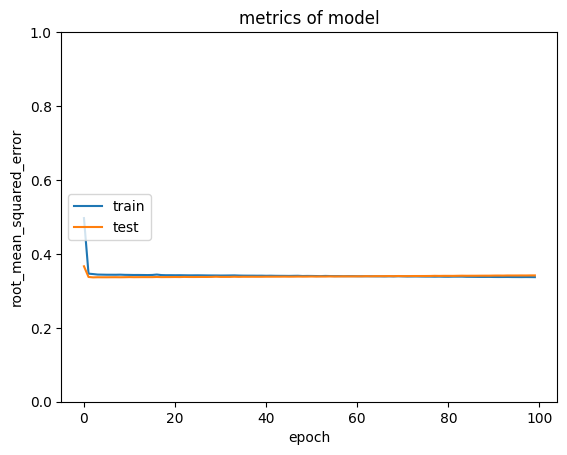

In [30]:
#showing the plot of residual
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('metrics of model')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1)
plt.legend(['train','test'], loc='center left')
plt.show

In [31]:
place_df = place[['id', 'name','tour_category_id', 'rating_score', 'price']]
place_df.columns = ['id','place_name','category','rating','price']
df=filtered_data.copy()

user_id = df.user_id.sample(1).iloc[0]
place_visited_by_user = df[df.user_id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.tourist_destination_id.values)]['id']




In [32]:
place_not_visited

Series([], Name: id, dtype: int64)

In [33]:
if len(place_not_visited)==0 :
        place_not_visited = place_df[place_df['id'].isin(place_visited_by_user.tourist_destination_id.values)]['id']

In [34]:
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]

user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

print(user_place_array.shape)
ratings= model.predict([user_place_array[:,0], user_place_array[:,1]]).flatten()

(36, 2)
2/2 [==============================] - 0s 6ms/step


In [35]:
top_ratings_indices = ratings.argsort()[-11:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
recommended_place_ids = list(recommended_place_ids)
print(recommended_place_ids)

[23, 34, 6, 18, 5, 16, 21, 36, 8, 2, 30]


In [36]:
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'score',
        ascending=False
    )
    .head(5)
    .tourist_destination_id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 10 place recommendation')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,11)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

jsonData = []
for row, i in zip(recommended_place.itertuples(), range(1,11)):
  jsonData.append({
      "nama": row.place_name,
      "harga": row.price,
      "rating": row.rating
  })

finalJsonData = {
    "data": jsonData
}
y = json.dumps(finalJsonData, indent=4)
print(y)


Daftar rekomendasi untuk: User a73naa79-18w8-4c89-8003-71yhs88293e3

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Taman Harmoni Keputih : e13348f5-233e-44df-9c55-a821cd969b52
Museum Kesehatan Dr. Adhyatma : 568024bb-641d-41a3-9791-37f42baed746
Patung Buddha Empat Rupa : e13348f5-233e-44df-9c55-a821cd969b52
Taman Prestasi : 568024bb-641d-41a3-9791-37f42baed746
Taman Ekspresi Dan Perpustakaan : e1004438-0b73-4c9e-8b64-5f36285c711c

------------------------------------------------------------
Top 10 place recommendation
------------------------------------------------------------
1 . Taman Hiburan Rakyat 
     e13348f5-233e-44df-9c55-a821cd969b52 , Harga Tiket Masuk  5000 , Rating Wisata  5 

2 . Balai Kota Surabaya 
     e13348f5-233e-44df-9c55-a821cd969b52 , Harga Tiket Masuk  0 , Rating Wisata  1 

3 . Monumen Jalesveva Jayamahe 
     7890e53f-bece-438f-a82a-

In [37]:
#Deploy

In [38]:
saved_model='saved_model/1'
tf.saved_model.save(model, export_dir=saved_model)

In [39]:
#Select mode of optimization
mode="Speed"
if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
else:
    optimization = tf.lite.Optimize.DEFAULT

In [40]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
converter.optimizations=[optimization]
tflite_model=converter.convert();

In [41]:
import pathlib

In [42]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)


21336

In [43]:
import joblib

joblib.dump(modelc, "model.joblib")


['model.joblib']

In [44]:
saved_model_path = "./my_model.h5"
model.save(saved_model_path)
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

/bin/bash: tensorflowjs_converter: command not found
